In [1]:
!pip install xlrd 
!pip install openpyxl
!pip install msoffcrypto-tool
!pip install -q optuna

DEPRECATION: ariadne 0.15.1 has a non-standard dependency specifier starlette>0.17<0.20. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of ariadne or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: ariadne 0.15.1 has a non-standard dependency specifier starlette>0.17<0.20. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of ariadne or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: ariadne 0.15.1 has a non-standard dependency specifier starlette>0.17<0.20. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of ariadne or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: ariadne 0.15.1 has a non-standard dependency specifier starlette>0.17<0.20. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of ariadne or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

import optuna

# Data searching 

## Lists_on

In [3]:
years = [i for i in range(2016, 2023)]
quarters_dict = {
    2016: [i for i in range(1, 5)],
    2017: [i for i in range(1, 5)],
    2018: [i for i in range(1, 5)],
    2019: [i for i in range(1, 5)],
    2020: [i for i in range(1, 5)],
    2021: [i for i in range(1, 5)],
    2022: [i for i in range(1, 4)],
    2023: [i for i in range(1, 3)],

}
df_full = pd.DataFrame()
         
for year in years:
    for n_quarter in quarters_dict[year]:
        otstup = 5
        if year == 2022 and n_quarter == 4 or year >= 2023:
            otstup = 4
            
        path = f"data/Lists ON/List ON_{year}/{n_quarter} quarter {year}.xls" 
        df = pd.read_excel(path)[otstup:]

        new_col = df.iloc[1].combine_first(df.iloc[0])
        new_col = list(new_col.values)

        df = df[3:]
        df.columns = new_col
        df = df.reset_index(drop=True)

        df['Год'] = np.full((df.shape[0],), year)
        df['Квартал'] = np.full((df.shape[0],), n_quarter)
        df['Отделение'] = np.full((df.shape[0],), 'Незвестное отделение')

        n = df.shape[0]
        name = ""
        ind_start = -1
        ind_end = -1
        
        for i, value in enumerate(df['№ п/п']):
            if type(value) == str and ('Отделение' in value or 'Дальне' in value):
                if ind_start == -1:
                    ind_start = df.loc[df['№ п/п'] == value].index[0]
                    name = " ".join(value.split(" ")[1:])
                else:
                    ind_end = df.loc[df['№ п/п'] == value].index[0]
                    df.loc[ind_start:ind_end, 'Отделение'] = name
                    df = df.drop(ind_start)
                    ind_start = ind_end
                    name = " ".join(value.split(" ")[1:])
            if i == n - 1:
                df.loc[ind_end:, 'Отделение'] = name 
         
        if year == 2016 and n_quarter == 1:
            df_full = df
        else:
#             print(year, n_quarter)
#             print(df.index)
#             print(df_full.index)
            if year >= 2023:
                df = df.iloc[:,1:]
                df = df.reset_index(drop=True)

                
            df_full = pd.concat([df_full, df], ignore_index = True)
            df_full = df_full.reset_index(drop=True)

df_full = df_full.reset_index(drop=True)

In [4]:
df_full = df_full.iloc[:,1:]
df_full

,"Наименование, адрес, реестровый номер объекта",Год постройки,Дата принятия на баланс Банка России,"Общая площадь объекта недвижимости, \nкв. м",Общая площадь здания кв. м,Занято службами Банка России,Не занято (не исполь\nзуется),Сдается Банком России в аренду,Аренду\nется Банком России,Сдается Банком России в субаренду,...,Передано Банком России по договору безвоз-мездного пользо-вания,Передано Банку России по договору безвоз-мездного пользо-вания,"Балансовая стоимость, руб.","в том числе переоценка, руб.","Сумма начисленной амортизации, руб.","Остаточная стоимость, руб.",Техническое состояние,Год,Квартал,Отделение
0,"Помещение объект № 2 (Вспомогательный), 675000...",1980,13.07.1990,217.7,217.7,217.7,0,0,0,0,...,0,0,1638812.21,937438.23,591497.66,1047314.55,Удовлетворительное,2016,1,Благовещенск
1,"Административное здание, 676014, Амурская обла...",1978,27.12.1990,389.1,389.1,0,0,389.1,0,0,...,0,0,1050734.76,771306.47,446494.59,604240.17,Удовлетворительное,2016,1,Благовещенск
2,"Административное здание, лит. А, А1, 676980, К...",1959,27.12.1990,237.7,237.7,0,0,0,0,0,...,237.7,0,126711.23,53749.02,93108.95,33602.28,Удовлетворительное,2016,1,Благовещенск
3,"Административное здание, 676530, Амурская обла...",1935,27.12.1990,830.2,830.2,0,830.2,0,0,0,...,0,0,1657840.58,NaN,1657840.58,NaN,Ветхое,2016,1,Благовещенск
4,"Административное здание, 675000, Амурская обла...",1958,14.02.1992,403.9,403.9,403.9,0,0,0,0,...,0,0,303892.63,162432.93,208772.46,95120.17,Удовлетворительное,2016,1,Благовещенск
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11222,"Помещение гаража Здания РКЦ, 689450, Чукотский...",1987,09.01.2016,70.1,NaN,70.1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Хорошее,2022,3,Анадырь
11223,"пункт резервного энергоснабжения, 689100, Чуко...",1997,09.01.2016,49.4,96.3,0,49.4,0,0,0,...,0,0,3167024.29,78402.86,949871.4,2217152.89,Хорошее,2022,3,Анадырь
11224,Теплая стоянка пункта резервного энергоснабжен...,1997,09.01.2016,46.9,NaN,0,46.9,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Хорошее,2022,3,Анадырь
11225,NaN,NaN,NaN,5580.6,5580.6,3846.6,609.3,234.8,0,0,...,808.3,0,234982136.16,25793069.44,54805238.68,180176897.48,NaN,2022,3,Анадырь


In [5]:
df_full['Техническое состояние'].unique()

array(['Удовлетворительное', 'Ветхое', 'Хорошее', nan, 'Аварийное'],
      dtype=object)

In [6]:
df_full.to_csv('Lists_on_2016_2022_all_quarters.csv', index=False)

## KC TR KR

In [7]:
file_dict = {
    'KS': [_ for _ in range(2017, 2024)],
    "TR": [_ for _ in range(2019, 2024)],
    "KR": [_ for _ in range(2017, 2024)],
}
files_lst = os.listdir("data/KC_TR_KR")
df_ks_full = pd.DataFrame()
df_kr_full = pd.DataFrame()

for file_type in file_dict:
    for year in file_dict[file_type]:
        
        path = f"data/KC_TR_KR/{file_type} on 01.01.{year}.csv"
        
        df = pd.read_csv(path)
        if file_type == "KS":
            if year <= 2019:
                df = df[3:]
                new_col = df.iloc[1].combine_first(df.iloc[0])
                new_col = df.iloc[2].combine_first(new_col)
                new_col = df.iloc[3].combine_first(new_col)
                new_col = list(new_col.values)
                df = df[7:]
                df.columns = new_col
            else:
                df = df[5:]
                new_col = df.iloc[1].combine_first(df.iloc[0])
                new_col = df.iloc[2].combine_first(new_col)
                new_col = df.iloc[3].combine_first(new_col)
                new_col = df.iloc[4].combine_first(new_col)
                new_col = df.iloc[5].combine_first(new_col)
                new_col = list(new_col.values)
                
                new_col[0] = "№\nработы"
                new_col[1] = "№ работы"
                new_col[2] = "Наименование раздела, наименование территориального учреждения, другого структурного подразделения Банка России, наименование и местонахождение объекта"
                for i, col_name in enumerate(new_col):
                    if col_name == 'Документ, подтверждающий состояние проекта/работы ':
                        new_col[i] = "№"
                        new_col[i + 1] = "Дата"
                df = df[7:]
                df.columns = new_col
                
            df = df.loc[:, ~df.columns.duplicated()].dropna(axis=1, how='all')

            if year == 2017:
                df_ks_full = df
            else:
                
                df_ks_full = pd.concat([df_ks_full, df],)
                df_ks_full = df_ks_full.reset_index(drop=True)
        
        elif file_type == "KR":
            df = df[4:]
            
            new_col = df.iloc[1].combine_first(df.iloc[0])
            new_col = df.iloc[2].combine_first(new_col)
            
            new_col = list(new_col.values)
            df.columns = new_col
            df = df[4:]
            df = df.loc[:, ~df.columns.duplicated()].dropna(axis=1, how='all')
            print("YEAR: ", year)
            print(df.columns)


            
            if year == 2017:
                df_kr_full = df
            else:
                if year <= 2019:
                    df_kr_full = pd.concat([df_kr_full, df],)
                    df_kr_full = df_ks_full.reset_index(drop=True)
#             print(df_kr_full)



        else:
            pass

YEAR:  2017
Index(['№ п/п',
       'Наименование раздела, наименование территориального учреждения, другого подразделения Банка России, наименование и местонахождение объекта',
       'Код строки', 'Сметная стоимость капитального ремонта, в т.ч. ПИР',
       'Освоено на 01.01.2016 г.', 'Всего:\n',
       'по объектам, обеспеченным документацией', 'Освоено за отчетный период',
       'Ожидаемое освоение за год', 'Дата завершения работ (месяц, год)\n'],
      dtype='object')
YEAR:  2018
Index(['№ п/п',
       'Наименование раздела, наименование территориального учреждения, другого подразделения Банка России, наименование и местонахождение объекта',
       'Сметная стоимость капитального ремонта, в т.ч. ПИР',
       'Освоено на 01.01.2017 г.', 'Всего:\n',
       'по объектам, обеспеченным документацией',
       'по объектам целевого резерва', 'Освоено за отчетный период',
       'Ожидаемое освоение за год', 'Дата завершения работ (месяц, год)\n'],
      dtype='object')
YEAR:  2019
Index([

In [8]:
df_ks_full

,№\nработы,№ работы,"Наименование раздела, наименование территориального учреждения, другого структурного подразделения Банка России, наименование и местонахождение объекта",начало,окончание,Сметная стоимость строительства,всего,в том числе незавершенное строительство,ВСЕГО:,"по объектам, обеспеченным документацией",...,Начало,Окончание,Всего,201.1000,201.2,% от \nгодового объема затрат (расходов) по актуальной версии плана,Код состояния проекта/работы,№,Дата,Пояснения к состоянию проекта/работы
0,NaN,NaN,Раздел 1. Строительство (реконструкция) и прио...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,o,NaN,Дальневосточное ГУ Банка России,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,o,NaN,Отделение по Хабаровскому краю Дальневосточног...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.55.,1.1.,"Реконструкция объектов ""Функциональное помеще...",2014-03-01 00:00:00,2017-03-01 00:00:00,29266.710000000003,5347.88,5347.88,16373.8,16373.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,в том числе: проектирование,2014-03-01 00:00:00,2015-03-01 00:00:00,5347.88,5347.88,5347.88,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,3.56,Создание системы приточно-вытяжной вентиляции ...,Отделение по Амурской области Дальневосточного...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2017-07-01 00:00:00,2023-12-01 00:00:00,1052747,NaN,1052747.0,100,61,255,14.11.2022,NaN
427,NaN,в том числе проектирование:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2017-07-01 00:00:00,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,NaN,реализация проектных решений,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-07-01 00:00:00,2023-12-01 00:00:00,1052747,NaN,1052747.0,100,NaN,NaN,NaN,NaN
429,NaN,Итого по разделу 3 (10 работ),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43042882,NaN,43042882.0,86.3905626021975,NaN,NaN,NaN,NaN


In [9]:
df_kr_full

,№\nработы,№ работы,"Наименование раздела, наименование территориального учреждения, другого структурного подразделения Банка России, наименование и местонахождение объекта",начало,окончание,Сметная стоимость строительства,всего,в том числе незавершенное строительство,ВСЕГО:,"по объектам, обеспеченным документацией",...,Начало,Окончание,Всего,201.1000,201.2,% от \nгодового объема затрат (расходов) по актуальной версии плана,Код состояния проекта/работы,№,Дата,Пояснения к состоянию проекта/работы
0,NaN,NaN,Раздел 1. Строительство (реконструкция) и прио...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,o,NaN,Дальневосточное ГУ Банка России,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,o,NaN,Отделение по Хабаровскому краю Дальневосточног...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.55.,1.1.,"Реконструкция объектов ""Функциональное помеще...",2014-03-01 00:00:00,2017-03-01 00:00:00,29266.710000000003,5347.88,5347.88,16373.8,16373.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,в том числе: проектирование,2014-03-01 00:00:00,2015-03-01 00:00:00,5347.88,5347.88,5347.88,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,3.56,Создание системы приточно-вытяжной вентиляции ...,Отделение по Амурской области Дальневосточного...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2017-07-01 00:00:00,2023-12-01 00:00:00,1052747,NaN,1052747.0,100,61,255,14.11.2022,NaN
427,NaN,в том числе проектирование:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2017-07-01 00:00:00,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,NaN,реализация проектных решений,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-07-01 00:00:00,2023-12-01 00:00:00,1052747,NaN,1052747.0,100,NaN,NaN,NaN,NaN
429,NaN,Итого по разделу 3 (10 работ),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43042882,NaN,43042882.0,86.3905626021975,NaN,NaN,NaN,NaN


In [10]:
df_ks_full.to_csv('KS_on_2017_2023.csv', index=False)

## Expenses

In [11]:
years_dict = {
    2016: '2016',
    2017: '2017',
    2018: '2018',
    2019: '2019',
    2020: '2020_new_base',
    2021: '2021',
}  
df_full = pd.DataFrame()

for year in years_dict:
    path = f"data/Expenses/{years_dict[year]}.xlsx"
    df = pd.read_excel(path)
    df = df[8:]
    row_values = df.iloc[0].tolist()
    row_values[0] = "Итог по смете"
    df.columns = row_values
    df = df[1:]
    
    if year == 2016:
            df_full = df
    else:             
        df_full = pd.concat([df_full, df], ignore_index = True)
        df_full = df_full.reset_index(drop=True)
df_full

,Итог по смете,Год сметы,Смета,Подразделение БР,Код статьи,Код вида расходов,Наименование вида расходов,Направление расходов,Начальный остаток,Отнесено,Конечный остаток,Дата проведения
0,Итого по смете - Смета Дальневосточного ГУ Бан...,2016,Смета Дальневосточного ГУ Банка России,NaN,NaN,NaN,NaN,NaN,NaN,249340186.14,249340186.14,NaN
1,Итого по виду - 132.0111.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0111,132.0111.000000,Оплата потребления электроэнергии,NaN,NaN,117598395.28,117598395.28,NaN
2,Итого по виду - 132.0112.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0112,132.0112.000000,Оплата потребления тепловой энергии,NaN,NaN,120901260.07,120901260.07,NaN
3,Итого по виду - 132.0113.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0113,132.0113.000000,"Оплата водоснабжения, канализации",NaN,NaN,9341943.11,9341943.11,NaN
4,Итого по виду - 132.0114.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0114,132.0114.000000,Оплата потребления газа,NaN,NaN,1498587.68,1498587.68,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24847,NaN,2021,Столовая Отделения Хабаровск,Отделение по Хабаровскому краю Дальневосточног...,134.1000,134.1000.030000,"Оплата услуг водоснабжения, водоотведения",ЗО 134.1000.03 Столовая Хабаровск. Оплата за х...,NaN,2081.38,2081.38,17.01.2022
24848,Итого по виду - 134.1000.050000,2021,Столовая Отделения Хабаровск,NaN,134.1000,134.1000.050000,Коммунальные услуги (расходы прошлых лет),NaN,NaN,20480.86,20480.86,NaN
24849,Итого по направлению - 134.1000.050000,2021,Столовая Отделения Хабаровск,NaN,134.1000,134.1000.050000,Коммунальные услуги (расходы прошлых лет),134.1000.050000,NaN,20480.86,20480.86,NaN
24850,Итого по направлению - 134.1000.05 Столовая Ха...,2021,Столовая Отделения Хабаровск,NaN,134.1000,134.1000.050000,Коммунальные услуги (расходы прошлых лет),134.1000.05 Столовая Хаб.Расходы по оплате ком...,NaN,20480.86,20480.86,NaN


In [12]:
df_full

,Итог по смете,Год сметы,Смета,Подразделение БР,Код статьи,Код вида расходов,Наименование вида расходов,Направление расходов,Начальный остаток,Отнесено,Конечный остаток,Дата проведения
0,Итого по смете - Смета Дальневосточного ГУ Бан...,2016,Смета Дальневосточного ГУ Банка России,NaN,NaN,NaN,NaN,NaN,NaN,249340186.14,249340186.14,NaN
1,Итого по виду - 132.0111.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0111,132.0111.000000,Оплата потребления электроэнергии,NaN,NaN,117598395.28,117598395.28,NaN
2,Итого по виду - 132.0112.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0112,132.0112.000000,Оплата потребления тепловой энергии,NaN,NaN,120901260.07,120901260.07,NaN
3,Итого по виду - 132.0113.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0113,132.0113.000000,"Оплата водоснабжения, канализации",NaN,NaN,9341943.11,9341943.11,NaN
4,Итого по виду - 132.0114.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0114,132.0114.000000,Оплата потребления газа,NaN,NaN,1498587.68,1498587.68,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24847,NaN,2021,Столовая Отделения Хабаровск,Отделение по Хабаровскому краю Дальневосточног...,134.1000,134.1000.030000,"Оплата услуг водоснабжения, водоотведения",ЗО 134.1000.03 Столовая Хабаровск. Оплата за х...,NaN,2081.38,2081.38,17.01.2022
24848,Итого по виду - 134.1000.050000,2021,Столовая Отделения Хабаровск,NaN,134.1000,134.1000.050000,Коммунальные услуги (расходы прошлых лет),NaN,NaN,20480.86,20480.86,NaN
24849,Итого по направлению - 134.1000.050000,2021,Столовая Отделения Хабаровск,NaN,134.1000,134.1000.050000,Коммунальные услуги (расходы прошлых лет),134.1000.050000,NaN,20480.86,20480.86,NaN
24850,Итого по направлению - 134.1000.05 Столовая Ха...,2021,Столовая Отделения Хабаровск,NaN,134.1000,134.1000.050000,Коммунальные услуги (расходы прошлых лет),134.1000.05 Столовая Хаб.Расходы по оплате ком...,NaN,20480.86,20480.86,NaN


In [13]:
df_full.head(20)

,Итог по смете,Год сметы,Смета,Подразделение БР,Код статьи,Код вида расходов,Наименование вида расходов,Направление расходов,Начальный остаток,Отнесено,Конечный остаток,Дата проведения
0,Итого по смете - Смета Дальневосточного ГУ Бан...,2016,Смета Дальневосточного ГУ Банка России,NaN,NaN,NaN,NaN,NaN,NaN,249340186.14,249340186.14,NaN
1,Итого по виду - 132.0111.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0111,132.0111.000000,Оплата потребления электроэнергии,NaN,NaN,117598395.28,117598395.28,NaN
2,Итого по виду - 132.0112.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0112,132.0112.000000,Оплата потребления тепловой энергии,NaN,NaN,120901260.07,120901260.07,NaN
3,Итого по виду - 132.0113.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0113,132.0113.000000,"Оплата водоснабжения, канализации",NaN,NaN,9341943.11,9341943.11,NaN
4,Итого по виду - 132.0114.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0114,132.0114.000000,Оплата потребления газа,NaN,NaN,1498587.68,1498587.68,NaN
5,"Итого по смете - Смета Аппарата,Отделений (Отд...",2016,"Смета Аппарата,Отделений (Отделения-НБ) и РКЦ ДГУ",NaN,NaN,NaN,NaN,NaN,NaN,172833763.76,172833763.76,NaN
6,Итого по смете - Смета Аппарата и РКЦ Дальнево...,2016,Смета Аппарата и РКЦ Дальневосточного ГУ Банка...,NaN,NaN,NaN,NaN,NaN,NaN,16283215.98,16283215.98,NaN
7,Итого по смете - Смета Аппарата Дальневосточно...,2016,Смета Аппарата Дальневосточного ГУ Банка Росси...,NaN,NaN,NaN,NaN,NaN,NaN,10326059.01,10326059.01,NaN
8,Итого по статье - 100.0000,2016,Смета Аппарата Дальневосточного ГУ Банка Росси...,NaN,100.0000,NaN,NaN,NaN,NaN,10326059.01,10326059.01,NaN
9,Итого по статье - 130.0000,2016,Смета Аппарата Дальневосточного ГУ Банка Росси...,NaN,130.0000,NaN,NaN,NaN,NaN,10326059.01,10326059.01,NaN


In [14]:
df_full.to_csv('Expenses_2016_2021s.csv', index=False)

In [15]:
df_expenses = pd.read_csv('Expenses_2016_2021s.csv')
df_expenses

,Итог по смете,Год сметы,Смета,Подразделение БР,Код статьи,Код вида расходов,Наименование вида расходов,Направление расходов,Начальный остаток,Отнесено,Конечный остаток,Дата проведения
0,Итого по смете - Смета Дальневосточного ГУ Бан...,2016,Смета Дальневосточного ГУ Банка России,NaN,NaN,NaN,NaN,NaN,NaN,2.493402e+08,2.493402e+08,NaN
1,Итого по виду - 132.0111.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0111,132.0111.000000,Оплата потребления электроэнергии,NaN,NaN,1.175984e+08,1.175984e+08,NaN
2,Итого по виду - 132.0112.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0112,132.0112.000000,Оплата потребления тепловой энергии,NaN,NaN,1.209013e+08,1.209013e+08,NaN
3,Итого по виду - 132.0113.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0113,132.0113.000000,"Оплата водоснабжения, канализации",NaN,NaN,9.341943e+06,9.341943e+06,NaN
4,Итого по виду - 132.0114.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0114,132.0114.000000,Оплата потребления газа,NaN,NaN,1.498588e+06,1.498588e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24847,NaN,2021,Столовая Отделения Хабаровск,Отделение по Хабаровскому краю Дальневосточног...,134.1000,134.1000.030000,"Оплата услуг водоснабжения, водоотведения",ЗО 134.1000.03 Столовая Хабаровск. Оплата за х...,NaN,2.081380e+03,2.081380e+03,17.01.2022
24848,Итого по виду - 134.1000.050000,2021,Столовая Отделения Хабаровск,NaN,134.1000,134.1000.050000,Коммунальные услуги (расходы прошлых лет),NaN,NaN,2.048086e+04,2.048086e+04,NaN
24849,Итого по направлению - 134.1000.050000,2021,Столовая Отделения Хабаровск,NaN,134.1000,134.1000.050000,Коммунальные услуги (расходы прошлых лет),134.1000.050000,NaN,2.048086e+04,2.048086e+04,NaN
24850,Итого по направлению - 134.1000.05 Столовая Ха...,2021,Столовая Отделения Хабаровск,NaN,134.1000,134.1000.050000,Коммунальные услуги (расходы прошлых лет),134.1000.05 Столовая Хаб.Расходы по оплате ком...,NaN,2.048086e+04,2.048086e+04,NaN


# Data handling and exploration 

## Lists_on


In [16]:
df_lists = pd.read_csv('Lists_on_2016_2022_all_quarters.csv')
df_lists.head()

,"Наименование, адрес, реестровый номер объекта",Год постройки,Дата принятия на баланс Банка России,"Общая площадь объекта недвижимости, \nкв. м",Общая площадь здания кв. м,Занято службами Банка России,Не занято (не исполь\nзуется),Сдается Банком России в аренду,Аренду\nется Банком России,Сдается Банком России в субаренду,...,Передано Банком России по договору безвоз-мездного пользо-вания,Передано Банку России по договору безвоз-мездного пользо-вания,"Балансовая стоимость, руб.","в том числе переоценка, руб.","Сумма начисленной амортизации, руб.","Остаточная стоимость, руб.",Техническое состояние,Год,Квартал,Отделение
0,"Помещение объект № 2 (Вспомогательный), 675000...",1980.0,13.07.1990,217.7,217.7,217.7,0.0,0.0,0.0,0.0,...,0.0,0.0,1638812.21,937438.23,591497.66,1047314.55,Удовлетворительное,2016,1,Благовещенск
1,"Административное здание, 676014, Амурская обла...",1978.0,27.12.1990,389.1,389.1,0.0,0.0,389.1,0.0,0.0,...,0.0,0.0,1050734.76,771306.47,446494.59,604240.17,Удовлетворительное,2016,1,Благовещенск
2,"Административное здание, лит. А, А1, 676980, К...",1959.0,27.12.1990,237.7,237.7,0.0,0.0,0.0,0.0,0.0,...,237.7,0.0,126711.23,53749.02,93108.95,33602.28,Удовлетворительное,2016,1,Благовещенск
3,"Административное здание, 676530, Амурская обла...",1935.0,27.12.1990,830.2,830.2,0.0,830.2,0.0,0.0,0.0,...,0.0,0.0,1657840.58,NaN,1657840.58,NaN,Ветхое,2016,1,Благовещенск
4,"Административное здание, 675000, Амурская обла...",1958.0,14.02.1992,403.9,403.9,403.9,0.0,0.0,0.0,0.0,...,0.0,0.0,303892.63,162432.93,208772.46,95120.17,Удовлетворительное,2016,1,Благовещенск


In [17]:
grouped_df = df_lists.groupby(['Год', 'Квартал'])['Балансовая стоимость, руб.'].mean()
df_lists['Среднее Балансовая стоимость, руб'] = df_lists.groupby(['Год', 'Квартал'])['Балансовая стоимость, руб.'].transform('mean')
# grouped_df

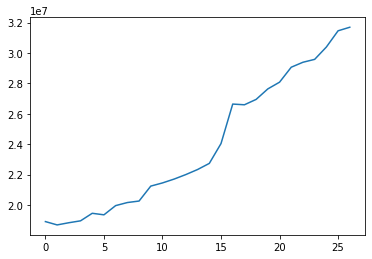

In [18]:
import matplotlib.pyplot as plt
grouped_df = grouped_df.reset_index()

# Plot the results
grouped_df['Балансовая стоимость, руб.'].plot()
# plt.xticks([_ for _ in range(1, grouped_df.shape[0] + 1)], [f"Q{i % 4}" for i in range(1, grouped_df.shape[0] + 1)])
# plt.xlabel('Quarter')
# plt.ylabel('Mean Value')
# plt.title('Mean Value by Quarter')
plt.show()

In [19]:
grouped_df = df_lists.groupby(['Год', 'Квартал'])['Сдается Банком России в аренду'].mean()
df_lists['Среднее Сдается Банком России в аренду'] = df_lists.groupby(['Год', 'Квартал'])['Сдается Банком России в аренду'].transform('mean')
# grouped_df

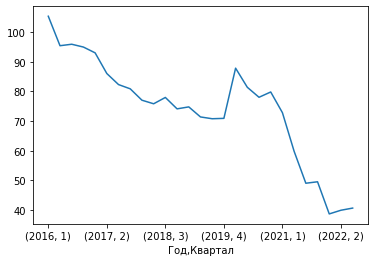

In [20]:
# Plot the results
grouped_df.plot()
plt.show()

In [21]:
df_lists

,"Наименование, адрес, реестровый номер объекта",Год постройки,Дата принятия на баланс Банка России,"Общая площадь объекта недвижимости, \nкв. м",Общая площадь здания кв. м,Занято службами Банка России,Не занято (не исполь\nзуется),Сдается Банком России в аренду,Аренду\nется Банком России,Сдается Банком России в субаренду,...,"Балансовая стоимость, руб.","в том числе переоценка, руб.","Сумма начисленной амортизации, руб.","Остаточная стоимость, руб.",Техническое состояние,Год,Квартал,Отделение,"Среднее Балансовая стоимость, руб",Среднее Сдается Банком России в аренду
0,"Помещение объект № 2 (Вспомогательный), 675000...",1980.0,13.07.1990,217.7,217.7,217.70,0.0,0.00,0.0,0.0,...,1.638812e+06,9.374382e+05,5.914977e+05,1.047315e+06,Удовлетворительное,2016,1,Благовещенск,1.890575e+07,105.305752
1,"Административное здание, 676014, Амурская обла...",1978.0,27.12.1990,389.1,389.1,0.00,0.0,389.10,0.0,0.0,...,1.050735e+06,7.713065e+05,4.464946e+05,6.042402e+05,Удовлетворительное,2016,1,Благовещенск,1.890575e+07,105.305752
2,"Административное здание, лит. А, А1, 676980, К...",1959.0,27.12.1990,237.7,237.7,0.00,0.0,0.00,0.0,0.0,...,1.267112e+05,5.374902e+04,9.310895e+04,3.360228e+04,Удовлетворительное,2016,1,Благовещенск,1.890575e+07,105.305752
3,"Административное здание, 676530, Амурская обла...",1935.0,27.12.1990,830.2,830.2,0.00,830.2,0.00,0.0,0.0,...,1.657841e+06,NaN,1.657841e+06,NaN,Ветхое,2016,1,Благовещенск,1.890575e+07,105.305752
4,"Административное здание, 675000, Амурская обла...",1958.0,14.02.1992,403.9,403.9,403.90,0.0,0.00,0.0,0.0,...,3.038926e+05,1.624329e+05,2.087725e+05,9.512017e+04,Удовлетворительное,2016,1,Благовещенск,1.890575e+07,105.305752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11222,"Помещение гаража Здания РКЦ, 689450, Чукотский...",1987.0,09.01.2016,70.1,NaN,70.10,0.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,Хорошее,2022,3,Анадырь,3.169802e+07,40.673370
11223,"пункт резервного энергоснабжения, 689100, Чуко...",1997.0,09.01.2016,49.4,96.3,0.00,49.4,0.00,0.0,0.0,...,3.167024e+06,7.840286e+04,9.498714e+05,2.217153e+06,Хорошее,2022,3,Анадырь,3.169802e+07,40.673370
11224,Теплая стоянка пункта резервного энергоснабжен...,1997.0,09.01.2016,46.9,NaN,0.00,46.9,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,Хорошее,2022,3,Анадырь,3.169802e+07,40.673370
11225,NaN,NaN,NaN,5580.6,5580.6,3846.60,609.3,234.80,0.0,0.0,...,2.349821e+08,2.579307e+07,5.480524e+07,1.801769e+08,NaN,2022,3,Анадырь,3.169802e+07,40.673370


# Merge data 

In [22]:
df_lists = pd.read_csv('Lists_on_2016_2022_all_quarters.csv')
df_expenses = pd.read_csv('Expenses_2016_2021s.csv')

In [23]:
df_lists['Наименование, адрес, реестровый номер объекта'] = df_lists['Наименование, адрес, реестровый номер объекта'].str.lower()

In [24]:
df_lists.head(3)

,"Наименование, адрес, реестровый номер объекта",Год постройки,Дата принятия на баланс Банка России,"Общая площадь объекта недвижимости, \nкв. м",Общая площадь здания кв. м,Занято службами Банка России,Не занято (не исполь\nзуется),Сдается Банком России в аренду,Аренду\nется Банком России,Сдается Банком России в субаренду,...,Передано Банком России по договору безвоз-мездного пользо-вания,Передано Банку России по договору безвоз-мездного пользо-вания,"Балансовая стоимость, руб.","в том числе переоценка, руб.","Сумма начисленной амортизации, руб.","Остаточная стоимость, руб.",Техническое состояние,Год,Квартал,Отделение
0,"помещение объект № 2 (вспомогательный), 675000...",1980.0,13.07.1990,217.7,217.7,217.7,0.0,0.0,0.0,0.0,...,0.0,0.0,1638812.21,937438.23,591497.66,1047314.55,Удовлетворительное,2016,1,Благовещенск
1,"административное здание, 676014, амурская обла...",1978.0,27.12.1990,389.1,389.1,0.0,0.0,389.1,0.0,0.0,...,0.0,0.0,1050734.76,771306.47,446494.59,604240.17,Удовлетворительное,2016,1,Благовещенск
2,"административное здание, лит. а, а1, 676980, к...",1959.0,27.12.1990,237.7,237.7,0.0,0.0,0.0,0.0,0.0,...,237.7,0.0,126711.23,53749.02,93108.95,33602.28,Удовлетворительное,2016,1,Благовещенск


In [25]:
df_expenses.head(10)

,Итог по смете,Год сметы,Смета,Подразделение БР,Код статьи,Код вида расходов,Наименование вида расходов,Направление расходов,Начальный остаток,Отнесено,Конечный остаток,Дата проведения
0,Итого по смете - Смета Дальневосточного ГУ Бан...,2016,Смета Дальневосточного ГУ Банка России,NaN,NaN,NaN,NaN,NaN,NaN,2.493402e+08,2.493402e+08,NaN
1,Итого по виду - 132.0111.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0111,132.0111.000000,Оплата потребления электроэнергии,NaN,NaN,1.175984e+08,1.175984e+08,NaN
2,Итого по виду - 132.0112.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0112,132.0112.000000,Оплата потребления тепловой энергии,NaN,NaN,1.209013e+08,1.209013e+08,NaN
3,Итого по виду - 132.0113.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0113,132.0113.000000,"Оплата водоснабжения, канализации",NaN,NaN,9.341943e+06,9.341943e+06,NaN
4,Итого по виду - 132.0114.000000,2016,Смета Дальневосточного ГУ Банка России,NaN,132.0114,132.0114.000000,Оплата потребления газа,NaN,NaN,1.498588e+06,1.498588e+06,NaN
5,"Итого по смете - Смета Аппарата,Отделений (Отд...",2016,"Смета Аппарата,Отделений (Отделения-НБ) и РКЦ ДГУ",NaN,NaN,NaN,NaN,NaN,NaN,1.728338e+08,1.728338e+08,NaN
6,Итого по смете - Смета Аппарата и РКЦ Дальнево...,2016,Смета Аппарата и РКЦ Дальневосточного ГУ Банка...,NaN,NaN,NaN,NaN,NaN,NaN,1.628322e+07,1.628322e+07,NaN
7,Итого по смете - Смета Аппарата Дальневосточно...,2016,Смета Аппарата Дальневосточного ГУ Банка Росси...,NaN,NaN,NaN,NaN,NaN,NaN,1.032606e+07,1.032606e+07,NaN
8,Итого по статье - 100.0000,2016,Смета Аппарата Дальневосточного ГУ Банка Росси...,NaN,100.0000,NaN,NaN,NaN,NaN,1.032606e+07,1.032606e+07,NaN
9,Итого по статье - 130.0000,2016,Смета Аппарата Дальневосточного ГУ Банка Росси...,NaN,130.0000,NaN,NaN,NaN,NaN,1.032606e+07,1.032606e+07,NaN


In [26]:
df_expenses = df_expenses.dropna(subset=['Направление расходов'])
df_expenses = df_expenses[df_expenses['Направление расходов'].str.split(" ").apply(len) > 1]


df_expenses['Направление расходов'].isnull().sum(), df_expenses.shape

(0, (23017, 12))

In [27]:
df_final = df_expenses[['Год сметы', 'Наименование вида расходов', 'Направление расходов', 'Отнесено']]

In [28]:
df_final.shape

(23017, 4)

In [29]:
df_final['Год сметы'] = pd.to_datetime(df_final['Год сметы'].astype(str))

C:\Users\eresque\AppData\Local\Temp\ipykernel_21944\2091571070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Год сметы'] = pd.to_datetime(df_final['Год сметы'].astype(str))


In [30]:
df_final.isnull().sum()

Год сметы                      0
Наименование вида расходов     0
Направление расходов           0
Отнесено                      16
dtype: int64

In [31]:
df_expenses['Наименование вида расходов'].unique()

array(['Оплата потребления электроэнергии',
       'Оплата потребления тепловой энергии',
       'Оплата водоснабжения, канализации', 'Оплата потребления газа',
       'Расходы на коммунальные услуги',
       'Расходы по оплате потребления электроэнергии',
       'Расходы по оплате всех видов отопления зданий и сооружений (кроме электро- и газового снабжения)',
       'Расходы по оплате услуг водоснабжения, водоотведения',
       'Расходы на коммунальные услуги (расходы прошлых лет)',
       'Расходы по оплате потребления газа',
       'Оплата всех видов отопления зданий и сооружений (кроме электро- и газового снабжения)',
       'Оплата услуг водоснабжения, водоотведения',
       'Коммунальные услуги (расходы прошлых лет)'], dtype=object)

In [32]:
import re

def contains_no_letters(list):
    for s in list:
        if bool(re.search(r'[А-яЁё]+', s)):
            return False
    return True

In [33]:
import itertools

def all_combinations(lst):
    return [list(comb) for i in range(len(lst) + 1, 0, -1) for comb in itertools.combinations(lst, i)]

In [34]:
def check_in_lists_on(all_comb_lst):
    for comb in all_comb_lst:
        combined_mask = df_lists['Наименование, адрес, реестровый номер объекта'].str.contains(comb[0], na=False)
        for j in range(1, len(comb)):
            temp_df = df_lists['Наименование, адрес, реестровый номер объекта'].str.contains(comb[j], na=False)
            combined_mask = combined_mask & temp_df
            
        selected_rows = df_lists[combined_mask]
        
        if len(selected_rows):
            return selected_rows
    return False


In [35]:
### SUPER LONG CALCULATING UNIFIED DATAFRAME FOR LISTS ON & EXPENCES (~35min. cpu)
# names_of_expences_directions = df_expenses['Наименование вида расходов'].unique()
# names_of_expences_directions = np.append(names_of_expences_directions, 'Расходы прошлого года, признанные после отчетной даты.')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Расходы прошлого года.')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Другие расходы.Оплата водоснабжения здание')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата водоотведения')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Другие расходы.')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата потребления эл.энергии')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата водоотведение.')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата водоснабжения.')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Расходы прошлого года')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата водоснабжения')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата канализации')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата  канализации')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Затраты на горячее водоснабжение')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Затраты на холодное водоснабжение')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Затраты на канализацию')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата горячего водоснабжения')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата холодного водоснабжения')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата горячево водоснабжения')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата холодное водоснабжение')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата водоотведение')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата горячее водоснабжение')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Другие расходы ,')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата холодное водоснабжения')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Холодная вода')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплатата потребления электроэнергии')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата горячее водоснабжения')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за холодное водоснабжение')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за горячее водоснабжение')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за канализацию')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Плата за технологическое присоед. к электрическим сетям в случаях,не связанных со строительством и кап. ремонтом зданий и сооружений')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Плата за технологическое присоед. к электрическим сетям в случаях,не связанных со строительством и кап. ремонтом зданий и сооружений')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Холодное водоснабжение')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Водоотведение')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Горячее водоснабжение')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата потребления электроэнерги')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Другие расходы прошлых лет')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Водоснабжение холодная вода')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Водоснабжение горячая вода')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за потребление тепловой энергии')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Затраты на дизельное топливо')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата горячего водоснабжение')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата холодного водоснабжение')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за тепловую энергию по тарифам')
# names_of_expences_directions = np.append(names_of_expences_directions, 'по тарифам')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за прочие виды топлиа уголь, дрова и т.д.')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за дизельное топливо')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за электроэнергию')
# names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за водоотведение')
# list_ = [
#     "Оплата за  тепловую энергию",
#     "Оплата за  электроэнергию",
#     "Плата за технологическое присоединение к электрическим сетям",
#     "Оплата за горячее  водоснабжение"
#     "Оплата за  горячее водоснабжение",
#     "Оплата за  водоотведение",
#     "Оплата за услуги водоотведения",
#     "Оплата услуг водоотведения",
#     "Оплата за водоснабжение",
#     "Оплата за услуги горячего водоснабжения",
#     "Оплата за услуги холодного водоснабжения",
#     "Расходы по оплате услуг за холодное водоснабжение",
#     "Хаб.Расходы по оплате коммунальных услуг расходы прошлых лет"
# ]
# for i in list_:
#     names_of_expences_directions = np.append(names_of_expences_directions, i)

# names_of_expences_directions = np.append(names_of_expences_directions, 'по')
# names_of_expences_directions = np.append(names_of_expences_directions, 'за')


# characters = [')', '(']

# df_main = pd.DataFrame()
# expences_col_names = df_expenses.columns
# lists_on_col_names = df_lists.columns

# for index, row in tqdm(df_expenses.iterrows(), total=df_expenses.shape[0]):
#     expences_directions = row['Направление расходов']

    
#     for name in names_of_expences_directions:
#         expences_directions = expences_directions.replace(name, '')
#         expences_directions = expences_directions.lstrip("  ")
#         expences_directions = expences_directions.lstrip(", ")
#         expences_directions = expences_directions.lstrip(". ")
        
    
#     for character in characters:
#         expences_directions = expences_directions.replace(character, '')
#     expences_directions = expences_directions.replace(',', ' ')
#     expences_directions = expences_directions.lower()
    
#     expences_directions_lst = expences_directions.split(" ") 
#     expences_directions_lst = [string for string in expences_directions_lst if string.strip() and string != "-"]
    
#     expences_directions_lst_correct = []
    
#     for word in expences_directions_lst:
#         temp_df = df_lists['Наименование, адрес, реестровый номер объекта'].str.contains(word, na=False)
#         selected_rows = df_lists[temp_df]
#         if len(selected_rows) != 0:
#             expences_directions_lst_correct.append(word)
            
#     expences_directions_lst = expences_directions_lst_correct

#     if len(expences_directions_lst) == 0 or contains_no_letters(expences_directions_lst):
#         continue
#     expences_directions_lst = all_combinations(expences_directions_lst)

#     result = check_in_lists_on(expences_directions_lst)
#     year = row['Год сметы']
    
#     closest_lower_value = result.loc[result['Год'] <= year, 'Год'].max()
#     closest_row = result[result['Год'] == closest_lower_value]
    
#     if len(closest_row) == 0:
#         closest_higher = result[result['Год'] >= year]['Год'].sub(year).abs().idxmin()
#         closest_row = result.loc[[closest_higher]]
#     else:
#         nans_per_row = closest_row.isna().sum(axis=1)

#         # Step 2: Find the index of the row with minimum NaN values
#         min_nans_row_index = nans_per_row.idxmin()

#         # Check if there are multiple minimums
#         min_nans = nans_per_row.min()
#         min_rows_indexes = nans_per_row[nans_per_row == min_nans].index

#         # Step 3: Select the row(s) with minimum NaN values
#         row_with_least_nans = closest_row.loc[min_rows_indexes]
#         closest_row = closest_row.iloc[0]

#     data_dict = {expences_col_names[i]: [row.values[i]] for i in range(len(expences_col_names))}
#     for name in lists_on_col_names:
#         data_dict[name] = closest_row[name]

#     merged_row = pd.DataFrame(data_dict)
#     df_main = pd.concat([df_main, merged_row], ignore_index = True)
    

### Save .csv file

In [37]:
# df_main.to_csv('holy_data.csv', index=False)

# Feature engineering, model trainning and evaluation 

In [38]:
df = pd.read_csv('holy_data.csv')
XX, yy = df[['Наименование вида расходов', 'Направление расходов', "Дата проведения"]], df['Отнесено']
df.head()

,Итог по смете,Год сметы,Смета,Подразделение БР,Код статьи,Код вида расходов,Наименование вида расходов,Направление расходов,Начальный остаток,Отнесено,...,Передано Банком России по договору безвоз-мездного пользо-вания,Передано Банку России по договору безвоз-мездного пользо-вания,"Балансовая стоимость, руб.","в том числе переоценка, руб.","Сумма начисленной амортизации, руб.","Остаточная стоимость, руб.",Техническое состояние,Год,Квартал,Отделение
0,Итого по направлению - Расходы прошлого года. ...,2016,Смета Аппарата Дальневосточного ГУ Банка Росси...,NaN,132.0111,132.0111.000000,Оплата потребления электроэнергии,Расходы прошлого года. Оплата потребления элек...,NaN,9498.58,...,0.0,0.0,1249596.0,NaN,262415.15,987180.85,Удовлетворительное,2016,1,ГУ Банка России
1,NaN,2016,Смета Аппарата Дальневосточного ГУ Банка Росси...,Дальневосточное главное управление Центральног...,132.0111,132.0111.000000,Оплата потребления электроэнергии,Расходы прошлого года. Оплата потребления элек...,NaN,9498.58,...,0.0,0.0,1249596.0,NaN,262415.15,987180.85,Удовлетворительное,2016,1,ГУ Банка России
2,Итого по направлению - Расходы прошлого года. ...,2016,Смета Аппарата Дальневосточного ГУ Банка Росси...,NaN,132.0111,132.0111.000000,Оплата потребления электроэнергии,Расходы прошлого года. Оплата потребления элек...,NaN,16294.01,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,4,ГУ Банка России
3,NaN,2016,Смета Аппарата Дальневосточного ГУ Банка Росси...,Дальневосточное главное управление Центральног...,132.0111,132.0111.000000,Оплата потребления электроэнергии,Расходы прошлого года. Оплата потребления элек...,NaN,16294.01,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020,4,ГУ Банка России
4,Итого по направлению - Оплата потребления элек...,2016,Смета Аппарата Дальневосточного ГУ Банка Росси...,NaN,132.0111,132.0111.000000,Оплата потребления электроэнергии,Оплата потребления электроэнергии ул.Светланск...,NaN,304853.05,...,0.0,0.0,1249596.0,NaN,321770.96,927825.04,Удовлетворительное,2020,4,ГУ Банка России


## Create feature season for dates

In [39]:
XX['Дата проведения'].fillna('not stated', inplace=True)
seasons = {'01': 'Winter', '02': 'Winter', '03': 'Spring', '04': 'Spring', '05': 'Spring', '06': 'Summer', '07': 'Summer', '08': 'Summer', '09': 'Fall', '10': 'Fall', '11': 'Fall', '12': 'Winter'}
XX['Seasons'] = XX['Дата проведения'].apply(lambda x: seasons.get(x.split('.')[1], x) if x != 'not stated' else x)
XX = XX.drop(columns='Дата проведения')

C:\Users\eresque\AppData\Local\Temp\ipykernel_21944\3290578654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XX['Дата проведения'].fillna('not stated', inplace=True)
C:\Users\eresque\AppData\Local\Temp\ipykernel_21944\3290578654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XX['Seasons'] = XX['Дата проведения'].apply(lambda x: seasons.get(x.split('.')[1], x) if x != 'not stated' else x)


In [40]:
XX

,Наименование вида расходов,Направление расходов,Seasons
0,Оплата потребления электроэнергии,Расходы прошлого года. Оплата потребления элек...,not stated
1,Оплата потребления электроэнергии,Расходы прошлого года. Оплата потребления элек...,Winter
2,Оплата потребления электроэнергии,Расходы прошлого года. Оплата потребления элек...,not stated
3,Оплата потребления электроэнергии,Расходы прошлого года. Оплата потребления элек...,Winter
4,Оплата потребления электроэнергии,Оплата потребления электроэнергии ул.Светланск...,not stated
...,...,...,...
19836,"Оплата услуг водоснабжения, водоотведения",ЗО 134.1000.03 Столовая Хабаровск. Оплата за х...,Winter
19837,"Оплата услуг водоснабжения, водоотведения",ЗО 134.1000.03 Столовая Хабаровск. Оплата за х...,not stated
19838,"Оплата услуг водоснабжения, водоотведения",ЗО 134.1000.03 Столовая Хабаровск. Оплата за х...,Winter
19839,Коммунальные услуги (расходы прошлых лет),134.1000.05 Столовая Хаб.Расходы по оплате ком...,not stated


In [41]:
yy.fillna(value=yy.median(), inplace=True)

round((XX.isnull().sum()/len(df)*100),2)

Наименование вида расходов    0.0
Направление расходов          0.0
Seasons                       0.0
dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import KFold
from catboost import CatBoostRegressor


X_train, X_test, y_train,  y_test = train_test_split(XX, yy, test_size=0.15, random_state=42)
X_train.shape, X_test.shape

((16864, 3), (2977, 3))

## Hyperparametr tunning + cross validation

In [48]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 1000),
        'depth': trial.suggest_int('depth', 2, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2),
        'loss_function': 'MAPE',
        'verbose': False
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mapes = []

    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
#         print(X_train.shape, y_train.shape)
#         print(X_val_fold.shape, y_val_fold.shape)
        model = CatBoostRegressor(**params, cat_features=list(XX.columns))
        model.fit(X_train_fold, y_train_fold, early_stopping_rounds=10, verbose=False)
        
        y_pred = model.predict(X_val_fold)
        mape = mean_absolute_percentage_error(y_val_fold, y_pred)
        mapes.append(mape)

    mapes = np.mean(mapes)
    return mapes  

In [51]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1) ## set 5

[I 2023-11-25 13:52:22,184] A new study created in memory with name: no-name-7ab19f68-9d4b-4995-b606-22c7cafceb89
[I 2023-11-25 13:55:32,012] Trial 0 finished with value: 7.66350349144447 and parameters: {'iterations': 692, 'depth': 10, 'learning_rate': 0.10242759330244408}. Best is trial 0 with value: 7.66350349144447.


In [52]:
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

Number of finished trials:  1
Best trial:
Value:  7.66350349144447
Params: 
    iterations: 692
    depth: 10
    learning_rate: 0.10242759330244408


In [ ]:
from matplotlib import pyplot as plt
print(trial.params)
model = CatBoostRegressor(**trial.params,
                          loss_function='MAPE', cat_features=list(XX.columns))  # Or another suitable loss function

# Fit model
model.fit(X_train, y_train, 
          verbose=100,  # Output training progress every 100 iterations
          plot=True)  

{'iterations': 692, 'depth': 10, 'learning_rate': 0.10242759330244408}


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9897070	total: 58.2ms	remaining: 40.2s
100:	learn: 0.9076513	total: 5.62s	remaining: 32.9s
200:	learn: 0.8767044	total: 11.6s	remaining: 28.4s
300:	learn: 0.8565182	total: 17.5s	remaining: 22.7s
400:	learn: 0.8461100	total: 23.2s	remaining: 16.8s


## Evaluate model result on train data (train in general not in here)

In [ ]:
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
1 - mape

## Get predictions + form submission.csv

In [ ]:
df_test = pd.read_csv('test_data.csv')
df_test

In [ ]:
XX = df_test[['Наименование вида расходов', 'Направление расходов', "Дата платежа"]]
XX


In [ ]:
XX['Дата платежа'].fillna('not stated', inplace=True)
seasons = {'01': 'Winter', '02': 'Winter', '03': 'Spring', '04': 'Spring', '05': 'Spring', '06': 'Summer', '07': 'Summer', '08': 'Summer', '09': 'Fall', '10': 'Fall', '11': 'Fall', '12': 'Winter'}
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'
print(type(XX['Дата платежа'][0]))
# create new column based on values of column A
XX['Season'] = XX['Дата платежа'].apply(lambda x: month_to_season(int(x.split('.')[0])) if '.' in x else x)
XX['Seasons'] = XX['Дата платежа'].apply(lambda x: seasons.get(x[:2], x) if x != 'not stated' else x)

XX = XX.drop(columns='Дата платежа')
XX = XX.drop(columns='Season')

XX

In [ ]:
XX

### Use model trinned before 

In [ ]:
y_pred = model.predict(XX)
y_pred 

In [ ]:
y_pred = pd.DataFrame({'Отнесено': y_pred})
y_pred

### Save submission.csv

In [ ]:
y_pred.to_csv("submission.csv", index=False)

# Old idea for submission 

In [ ]:
df_test = pd.read_csv('test_data.csv')

df_test

In [ ]:
import warnings
warnings.filterwarnings('ignore')
names_of_expences_directions = df_expenses['Наименование вида расходов'].unique()
names_of_expences_directions = np.append(names_of_expences_directions, 'Расходы прошлого года, признанные после отчетной даты.')
names_of_expences_directions = np.append(names_of_expences_directions, 'Расходы прошлого года.')
names_of_expences_directions = np.append(names_of_expences_directions, 'Другие расходы.Оплата водоснабжения здание')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата водоотведения')
names_of_expences_directions = np.append(names_of_expences_directions, 'Другие расходы.')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата потребления эл.энергии')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата водоотведение.')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата водоснабжения.')
names_of_expences_directions = np.append(names_of_expences_directions, 'Расходы прошлого года')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата водоснабжения')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата канализации')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата  канализации')
names_of_expences_directions = np.append(names_of_expences_directions, 'Затраты на горячее водоснабжение')
names_of_expences_directions = np.append(names_of_expences_directions, 'Затраты на холодное водоснабжение')
names_of_expences_directions = np.append(names_of_expences_directions, 'Затраты на канализацию')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата горячего водоснабжения')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата холодного водоснабжения')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата горячево водоснабжения')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата холодное водоснабжение')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата водоотведение')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата горячее водоснабжение')
names_of_expences_directions = np.append(names_of_expences_directions, 'Другие расходы ,')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата холодное водоснабжения')
names_of_expences_directions = np.append(names_of_expences_directions, 'Холодная вода')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплатата потребления электроэнергии')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата горячее водоснабжения')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за холодное водоснабжение')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за горячее водоснабжение')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за канализацию')
names_of_expences_directions = np.append(names_of_expences_directions, 'Плата за технологическое присоед. к электрическим сетям в случаях,не связанных со строительством и кап. ремонтом зданий и сооружений')
names_of_expences_directions = np.append(names_of_expences_directions, 'Плата за технологическое присоед. к электрическим сетям в случаях,не связанных со строительством и кап. ремонтом зданий и сооружений')
names_of_expences_directions = np.append(names_of_expences_directions, 'Холодное водоснабжение')
names_of_expences_directions = np.append(names_of_expences_directions, 'Водоотведение')
names_of_expences_directions = np.append(names_of_expences_directions, 'Горячее водоснабжение')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата потребления электроэнерги')
names_of_expences_directions = np.append(names_of_expences_directions, 'Другие расходы прошлых лет')
names_of_expences_directions = np.append(names_of_expences_directions, 'Водоснабжение холодная вода')
names_of_expences_directions = np.append(names_of_expences_directions, 'Водоснабжение горячая вода')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за потребление тепловой энергии')
names_of_expences_directions = np.append(names_of_expences_directions, 'Затраты на дизельное топливо')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата горячего водоснабжение')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата холодного водоснабжение')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за тепловую энергию по тарифам')
names_of_expences_directions = np.append(names_of_expences_directions, 'по тарифам')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за прочие виды топлиа уголь, дрова и т.д.')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за дизельное топливо')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за электроэнергию')
names_of_expences_directions = np.append(names_of_expences_directions, 'Оплата за водоотведение')
list_ = [
    "Оплата за  тепловую энергию",
    "Оплата за  электроэнергию",
    "Плата за технологическое присоединение к электрическим сетям",
    "Оплата за горячее  водоснабжение"
    "Оплата за  горячее водоснабжение",
    "Оплата за  водоотведение",
    "Оплата за услуги водоотведения",
    "Оплата услуг водоотведения",
    "Оплата за водоснабжение",
    "Оплата за услуги горячего водоснабжения",
    "Оплата за услуги холодного водоснабжения",
    "Расходы по оплате услуг за холодное водоснабжение",
    "Хаб.Расходы по оплате коммунальных услуг расходы прошлых лет"
]
for i in list_:
    names_of_expences_directions = np.append(names_of_expences_directions, i)

names_of_expences_directions = np.append(names_of_expences_directions, 'по')
names_of_expences_directions = np.append(names_of_expences_directions, 'за')

print(df_expenses['Наименование вида расходов'].unique())
print(df_test['Наименование вида расходов'].unique())
transform_expenses_dict = {
    'Электроэнергия': 'Оплата потребления электроэнергии',
    'Отопление': 'Оплата всех видов отопления зданий и сооружений (кроме электро- и газового снабжения)',
    'Водоснабжение': 'Оплата услуг водоснабжения, водоотведения' ,
    'Коммунальные услуги (расходы прошлых лет)': 'Расходы на коммунальные услуги (расходы прошлых лет)',
    'Газ': 'Оплата потребления газа'
}
characters = [')', '(']
k = 0
df_main = pd.DataFrame()
expences_col_names = df_expenses.columns
lists_on_col_names = df_lists.columns
mover = 0

for index, row_test in tqdm(df_test.iterrows(), total=df_test.shape[0]):
    ind = index + mover
    if ind < df_test.shape[0]:
        row_test = df_test.loc[ind]
    else:
        break
        
    current_expenses_dir = transform_expenses_dict[row_test['Наименование вида расходов']]
    # print(df_expenses[df_expenses['Направление расходов'] == row_test['Направление расходов']], current_expenses_dir)
    filtered_rows = df_expenses[(df_expenses['Направление расходов'] == row_test['Направление расходов'].replace("  ", " ")) & (df_expenses['Наименование вида расходов'] == current_expenses_dir)]
    n = len(filtered_rows)
    # print(filtered_rows)
    # break
    if n == 0:
        filtered_rows = df_expenses[(df_expenses['Направление расходов'] == row_test['Направление расходов']) & (df_expenses['Наименование вида расходов'] == current_expenses_dir)]
    if n:
        for indexx, row in filtered_rows.iterrows():
            # print(row)
            k += 1
            expences_directions = row['Направление расходов']
    
        
            for name in names_of_expences_directions:
                expences_directions = expences_directions.replace(name, '')
                expences_directions = expences_directions.lstrip("  ")
                expences_directions = expences_directions.lstrip(", ")
                expences_directions = expences_directions.lstrip(". ")
                
            
            for character in characters:
                expences_directions = expences_directions.replace(character, '')
            expences_directions = expences_directions.replace(',', ' ')
            expences_directions = expences_directions.lower()
            
            expences_directions_lst = expences_directions.split(" ") 
            expences_directions_lst = [string for string in expences_directions_lst if string.strip() and string != "-"]
            
            expences_directions_lst_correct = []
        
            for word in expences_directions_lst:
                temp_df = df_lists['Наименование, адрес, реестровый номер объекта'].str.contains(word, na=False)
                selected_rows = df_lists[temp_df]
                if len(selected_rows) != 0:
                    expences_directions_lst_correct.append(word)
                    
            expences_directions_lst = expences_directions_lst_correct
        
            if len(expences_directions_lst) == 0 or contains_no_letters(expences_directions_lst):
                continue
            expences_directions_lst = all_combinations(expences_directions_lst)
        
            result = check_in_lists_on(expences_directions_lst)
            year = row['Год сметы']
            
            closest_lower_value = result.loc[result['Год'] <= year, 'Год'].max()
            closest_row = result[result['Год'] == closest_lower_value]
            
            if len(closest_row) == 0:
                closest_higher = result[result['Год'] >= year]['Год'].sub(year).abs().idxmin()
                closest_row = result.loc[[closest_higher]]
            else:
                nans_per_row = closest_row.isna().sum(axis=1)
    
                min_nans_row_index = nans_per_row.idxmin()
        
                min_nans = nans_per_row.min()
                min_rows_indexes = nans_per_row[nans_per_row == min_nans].index
        
                row_with_least_nans = closest_row.loc[min_rows_indexes]
                closest_row = closest_row.iloc[0]
        
            data_dict = {expences_col_names[i]: [row.values[i]] for i in range(len(expences_col_names))}
            for name in lists_on_col_names:
                data_dict[name] = closest_row[name]
        
            merged_row = pd.DataFrame(data_dict)
            # print(merged_row)
            df_main = pd.concat([df_main, merged_row], ignore_index = True)
    else:
        num_cols = len(df_main.columns)

        # create new row containing NaN values
        new_row = pd.Series([np.nan] * num_cols, index=df_main.columns)
        
        # append new row to dataframe
        df_main = df_main.append(new_row, ignore_index=True)
    mover += n
    

In [ ]:
df_main.shape

In [ ]:
round((df_main.isnull().sum()/len(df_main)*100),2)

In [ ]:
mover, k

In [ ]:
columns_drop = [
    'Итог по смете',
    'Остаточная стоимость, ру',
    'Аренду\nется Банком России.1 ',
    'Сдается Банком России в аренду.1',
    'Не занято (не исполь\nзуется).1 '
]

In [ ]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)